In [429]:
import pandas as pd

In [430]:
df = pd.read_csv('APRN_COMB.csv')

In [431]:
df.columns

Index(['Date', 'Close', 'Close.1', 'Rates'], dtype='object')

In [432]:
#df = df.drop(['Volume', 'std', 'upper', 'lower'], axis = 1)

In [433]:
df['lag'] = df['Close'].shift()
df['lag_2'] = df['Close'].shift(60)

In [434]:
df.dropna(inplace=True)
df.drop('Close.1', axis = 1, inplace=True)

In [435]:
df.head()

,Date,Close,Rates,lag,lag_2
60,2017-10-20,5.08,1.07,5.17,6.72
61,2017-10-23,5.15,1.07,5.08,6.74
62,2017-10-24,5.08,1.07,5.15,6.61
63,2017-10-25,5.01,1.07,5.08,6.37
64,2017-10-26,5.03,1.07,5.01,6.20


In [436]:
df.tail()

,Date,Close,Rates,lag,lag_2
304,2018-10-10,1.34,2.03,1.38,3.58
305,2018-10-11,1.30,2.03,1.34,3.55
306,2018-10-12,1.34,2.03,1.30,3.40
307,2018-10-15,1.35,2.03,1.34,3.11
308,2018-10-16,1.35,2.03,1.35,3.18


In [437]:
df['std'] = df['Close'].rolling(5).std().dropna()

In [438]:
df.dropna(inplace=True)

In [439]:
df['Date'] = pd.to_datetime(df['Date'])

In [440]:
df.set_index('Date', inplace=True)

For GE I am going to make my train test split on the year 2014

In [441]:
train_df = df[:'2018-06']
test_df = df['2018-07':]

In [442]:
train_df.tail()

,Close,Rates,lag,lag_2,std
Date,,,,,
2018-06-25,3.26,1.9,3.33,2.00,0.046904
2018-06-26,3.18,1.9,3.26,1.87,0.075498
2018-06-27,3.25,1.9,3.18,1.80,0.056833
2018-06-28,3.22,1.9,3.25,1.85,0.055408
2018-06-29,3.35,1.9,3.22,1.86,0.063008


In [443]:
test_df.head()

,Close,Rates,lag,lag_2,std
Date,,,,,
2018-07-02,3.31,1.96,3.35,1.77,0.068337
2018-07-03,3.28,1.96,3.31,1.85,0.050695
2018-07-05,3.53,1.96,3.28,1.84,0.117346
2018-07-06,3.35,1.96,3.53,1.81,0.097365
2018-07-09,3.44,1.96,3.35,1.82,0.102323


To see this visually, we can make a line plot of the train and test data

In [444]:
import matplotlib.pyplot as plt

In [445]:
graph_df_train = train_df
maper = {'Close':'Train'}
graph_df_train.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [446]:
graph_df_test = test_df
maper = {'Close':'Test'}
graph_df_test.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


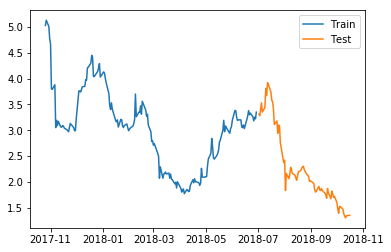

In [447]:
plt.plot(graph_df_train['Train'])
plt.plot(graph_df_test['Test'])
plt.legend();

As you can see, 2014 is a year where the pattern of a downward trend may begin again. Lets build a model to find out. 

In [448]:
df.head()

,Close,Rates,lag,lag_2,std
Date,,,,,
2017-10-26,5.03,1.07,5.01,6.20,0.054314
2017-10-27,5.13,1.07,5.03,6.22,0.060828
2017-10-30,5.01,1.07,5.13,5.83,0.052154
2017-10-31,4.77,1.07,5.01,5.85,0.132665
2017-11-01,4.67,1.23,4.77,5.81,0.193184


In [449]:
train_df = df[:'2018-06']
test_df = df['2018-07':]

In [450]:
test_df.head()

,Close,Rates,lag,lag_2,std
Date,,,,,
2018-07-02,3.31,1.96,3.35,1.77,0.068337
2018-07-03,3.28,1.96,3.31,1.85,0.050695
2018-07-05,3.53,1.96,3.28,1.84,0.117346
2018-07-06,3.35,1.96,3.53,1.81,0.097365
2018-07-09,3.44,1.96,3.35,1.82,0.102323


Scale Data

In [451]:
from sklearn.preprocessing import MinMaxScaler

In [452]:
scaler = MinMaxScaler()

In [453]:
X_train = train_df[['Rates', 'lag', 'std', 'lag_2']].values
X_test = test_df[['Rates', 'lag', 'std', 'lag_2']].values

In [454]:
X_train

array([[1.07      , 5.01      , 0.0543139 , 6.2       ],
       [1.07      , 5.03      , 0.06082763, 6.22      ],
       [1.07      , 5.13      , 0.05215362, 5.83      ],
       [1.07      , 5.01      , 0.13266499, 5.85      ],
       [1.23      , 4.77      , 0.19318385, 5.81      ],
       [1.23      , 4.67      , 0.52295315, 6.24      ],
       [1.23      , 3.8       , 0.5730794 , 5.14      ],
       [1.23      , 3.79      , 0.49362942, 5.12      ],
       [1.23      , 3.88      , 0.57416896, 5.36      ],
       [1.23      , 3.05      , 0.38996154, 5.65      ],
       [1.23      , 3.19      , 0.40162171, 5.5       ],
       [1.23      , 3.09      , 0.34246168, 5.39      ],
       [1.23      , 3.17      , 0.06418723, 5.31      ],
       [1.23      , 3.06      , 0.06188699, 5.24      ],
       [1.23      , 3.06      , 0.04505552, 5.25      ],
       [1.23      , 3.09      , 0.04549725, 5.47      ],
       [1.23      , 3.08      , 0.01949359, 5.48      ],
       [1.23      , 3.04      ,

In [455]:
train_df_sc = scaler.fit_transform(X_train)
test_df_sc = scaler.transform(X_test)

In [456]:
print(train_df_sc.shape)
print(test_df_sc.shape)

(170, 4)
(75, 4)


In [457]:
train_df_sc

array([[0.        , 0.96428571, 0.0674171 , 0.99099099],
       [0.        , 0.9702381 , 0.07910225, 0.9954955 ],
       [0.        , 1.        , 0.0635417 , 0.90765766],
       [0.        , 0.96428571, 0.20797336, 0.91216216],
       [0.19277108, 0.89285714, 0.31653988, 0.90315315],
       [0.19277108, 0.86309524, 0.90812249, 1.        ],
       [0.19277108, 0.60416667, 0.9980454 , 0.75225225],
       [0.19277108, 0.60119048, 0.85551779, 0.74774775],
       [0.19277108, 0.62797619, 1.        , 0.8018018 ],
       [0.19277108, 0.38095238, 0.66954501, 0.86711712],
       [0.19277108, 0.42261905, 0.69046254, 0.83333333],
       [0.19277108, 0.39285714, 0.58433365, 0.80855856],
       [0.19277108, 0.41666667, 0.08512914, 0.79054054],
       [0.19277108, 0.38392857, 0.08100268, 0.77477477],
       [0.19277108, 0.38392857, 0.05080822, 0.77702703],
       [0.19277108, 0.39285714, 0.05160066, 0.82657658],
       [0.19277108, 0.38988095, 0.00495194, 0.82882883],
       [0.19277108, 0.37797619,

In [458]:
from sklearn.svm import SVR

In [459]:
svr = SVR()

In [460]:
y_train = train_df['Close'].values.reshape(-1,1)

In [461]:
len(X_train)

170

In [462]:
len(y_train)

170

In [463]:
svr.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [464]:
y_pred = svr.predict(X_test)

In [465]:
len(y_pred)

75

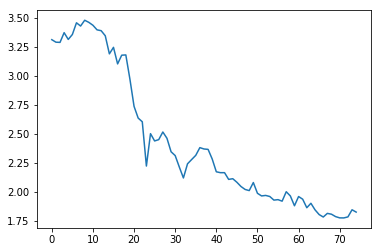

In [466]:

plt.plot(y_pred)

In [467]:
y_test = test_df['Close'].values

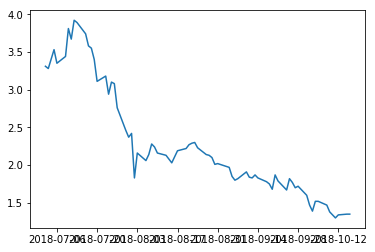

In [468]:
plt.plot(test_df['Close'])

In [469]:
from sklearn.metrics import r2_score

In [470]:
r2_score(y_pred, test_df['Close'])

0.7812920279545815

In [471]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [472]:
'''model = Sequential()
model.add(Dense(10, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(10, input_shape=(X_test.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=16, validation_data = (X_test, y_test), epochs=100, verbose=1)'''

"model = Sequential()\nmodel.add(Dense(10, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))\nmodel.add(Dense(10, input_shape=(X_test.shape[1],)))\nmodel.add(Dense(1))\nmodel.compile(optimizer='adam', loss='mean_squared_error')\nhistory = model.fit(X_train, y_train, batch_size=16, validation_data = (X_test, y_test), epochs=100, verbose=1)"

In [473]:
model = Sequential()
model.add(Dense(10, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(10, input_shape=(X_test.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=16, validation_data = (X_test, y_test), epochs=200, verbose=1)

Train on 170 samples, validate on 75 samples
Epoch 1/200
170/170 [==============================] - 1s 6ms/step - loss: 12.7399 - val_loss: 6.4831
Epoch 2/200
170/170 [==============================] - 0s 255us/step - loss: 10.6157 - val_loss: 4.8345
Epoch 3/200
170/170 [==============================] - 0s 381us/step - loss: 8.7445 - val_loss: 3.4440
Epoch 4/200
170/170 [==============================] - 0s 285us/step - loss: 6.9687 - val_loss: 2.2432
Epoch 5/200
170/170 [==============================] - 0s 354us/step - loss: 5.2178 - val_loss: 1.2989
Epoch 6/200
170/170 [==============================] - 0s 309us/step - loss: 3.5940 - val_loss: 0.7081
Epoch 7/200
170/170 [==============================] - 0s 362us/step - loss: 2.1605 - val_loss: 0.5805
Epoch 8/200
170/170 [==============================] - 0s 281us/step - loss: 1.1302 - val_loss: 0.8921
Epoch 9/200
170/170 [==============================] - 0s 288us/step - loss: 0.6859 - val_loss: 1.3750
Epoch 10/200
170/170 [======

170/170 [==============================] - 0s 224us/step - loss: 0.0261 - val_loss: 0.0205
Epoch 80/200
170/170 [==============================] - 0s 231us/step - loss: 0.0260 - val_loss: 0.0204
Epoch 81/200
170/170 [==============================] - 0s 206us/step - loss: 0.0261 - val_loss: 0.0203
Epoch 82/200
170/170 [==============================] - 0s 246us/step - loss: 0.0262 - val_loss: 0.0207
Epoch 83/200
170/170 [==============================] - 0s 237us/step - loss: 0.0261 - val_loss: 0.0206
Epoch 84/200
170/170 [==============================] - 0s 279us/step - loss: 0.0262 - val_loss: 0.0199
Epoch 85/200
170/170 [==============================] - 0s 305us/step - loss: 0.0265 - val_loss: 0.0212
Epoch 86/200
170/170 [==============================] - 0s 265us/step - loss: 0.0263 - val_loss: 0.0196
Epoch 87/200
170/170 [==============================] - 0s 294us/step - loss: 0.0268 - val_loss: 0.0213
Epoch 88/200
170/170 [==============================] - 0s 322us/step - loss:

170/170 [==============================] - 0s 286us/step - loss: 0.0247 - val_loss: 0.0203
Epoch 158/200
170/170 [==============================] - 0s 291us/step - loss: 0.0248 - val_loss: 0.0189
Epoch 159/200
170/170 [==============================] - 0s 286us/step - loss: 0.0250 - val_loss: 0.0196
Epoch 160/200
170/170 [==============================] - 0s 313us/step - loss: 0.0254 - val_loss: 0.0200
Epoch 161/200
170/170 [==============================] - 0s 290us/step - loss: 0.0251 - val_loss: 0.0195
Epoch 162/200
170/170 [==============================] - 0s 317us/step - loss: 0.0246 - val_loss: 0.0203
Epoch 163/200
170/170 [==============================] - 0s 305us/step - loss: 0.0251 - val_loss: 0.0189
Epoch 164/200
170/170 [==============================] - 0s 277us/step - loss: 0.0255 - val_loss: 0.0204
Epoch 165/200
170/170 [==============================] - 0s 301us/step - loss: 0.0248 - val_loss: 0.0192
Epoch 166/200
170/170 [==============================] - 0s 313us/ste

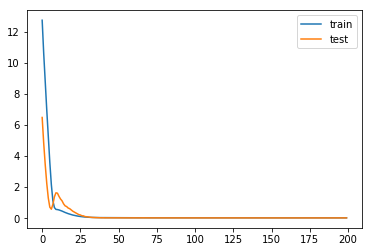

In [474]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [475]:
#plt.plot(history)

0.9646321557016261

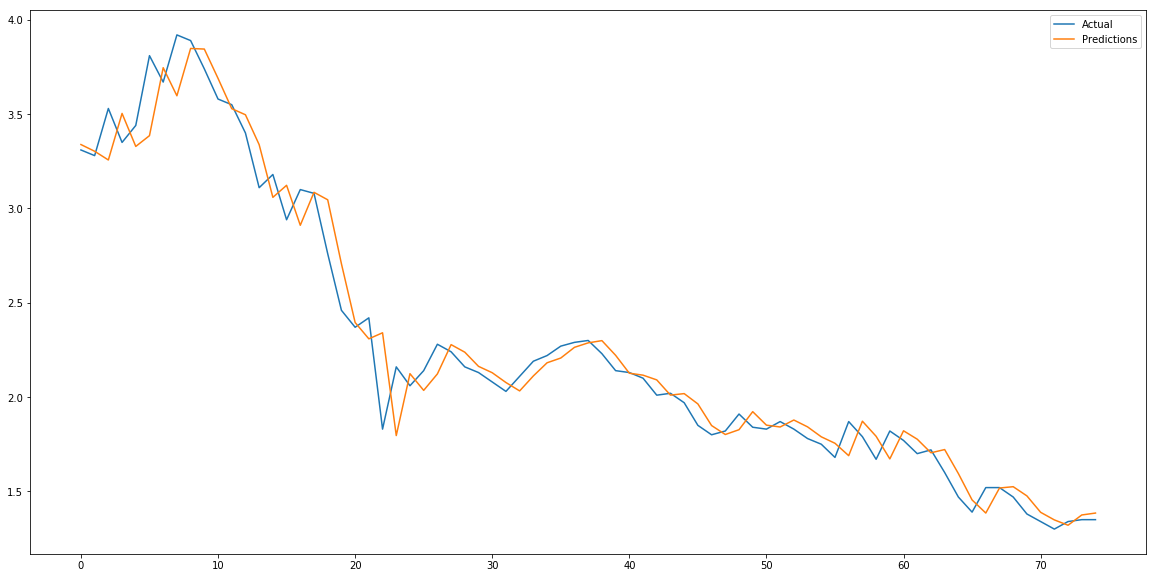

In [476]:
plt.figure(figsize=(20,10))
y_pred = model.predict(X_test)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predictions')
plt.legend()
r2_score(y_test, y_pred)

In [477]:
import numpy as np

In [478]:
df.tail()

,Close,Rates,lag,lag_2,std
Date,,,,,
2018-10-10,1.34,2.03,1.38,3.58,0.082341
2018-10-11,1.30,2.03,1.34,3.55,0.091214
2018-10-12,1.34,2.03,1.30,3.40,0.064653
2018-10-15,1.35,2.03,1.34,3.11,0.028636
2018-10-16,1.35,2.03,1.35,3.18,0.020736


In [479]:
rate = 1.3
lag = 1.3
std = 0.02

In [480]:
pred_1 = np.array([[rate, lag, std]])

In [481]:
pred_1 = np.array([[0.00324675, 0.194511396, 0.30064325]])

In [482]:
pred_1.shape

(1, 3)

In [483]:
#model.predict(pred_1)